In [312]:
import pandas as pd
from matplotlib import pyplot as plt

In [313]:
# Load a file under "data" folder
file = "./data/sense.csv"
data = pd.read_csv(file, sep=",", encoding="euc-kr")

In [314]:
data.head()

,Time,Collecting device ID,Barn number,Module ID,Type,Vlaue,Sensor time
0,2021-06-30 23:58,GW01,1,1,humidity,99.89995,20210630235847
1,2021-06-30 23:58,GW01,1,1,temp,21.09999,20210630235847
2,2021-06-30 23:58,GW01,1,1,co2,402.89000,20210630235819
3,2021-06-30 23:58,GW01,1,1,nh3,4.38000,20210630235819
4,2021-06-30 23:56,GW01,1,1,humidity,99.89994,20210630235647


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38924 entries, 0 to 38923
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  38924 non-null  object 
 1   Collecting device ID  38924 non-null  object 
 2   Barn number           38924 non-null  int64  
 3   Module ID             38924 non-null  int64  
 4   Type                  38924 non-null  object 
 5   Vlaue                 38924 non-null  float64
 6   Sensor time           38924 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [316]:
data['Sensor time'] = data['Sensor time'].astype(str)
data["Sensor time"]= data["Sensor time"].str[:12]
data['Sensor time'] = pd.to_datetime(data['Sensor time'], format="%Y%m%d%H%M")

In [317]:
data.drop('Time', axis = 1, inplace = True)
data.drop('Barn number', axis = 1, inplace = True)
data.drop('Module ID', axis = 1, inplace = True)

In [318]:
#Checking the null values in the data fields
data.isnull().sum(axis=0)

Type                    0
Vlaue                   0
Sensor time             0
dtype: int64

In [319]:
data[['Sensor time', 'Collecting device ID', 'Type', 'Vlaue']]

,Sensor time,Collecting device ID,Type,Vlaue
0,2021-06-30 23:58:00,GW01,humidity,99.899950
1,2021-06-30 23:58:00,GW01,temp,21.099990
2,2021-06-30 23:58:00,GW01,co2,402.890000
3,2021-06-30 23:58:00,GW01,nh3,4.380000
4,2021-06-30 23:56:00,GW01,humidity,99.899940
...,...,...,...,...
38919,2021-06-10 12:27:00,GW01,humidity,45.639000
38920,2021-06-10 12:23:00,GW01,nh3,11.934230
38921,2021-06-10 12:23:00,GW01,co2,409.215100
38922,2021-06-10 12:16:00,GW01,co2,402.246300


In [320]:
pivoted = data.pivot(['Sensor time','Collecting device ID'], 'Type', 'Vlaue')
#pivoted = data.pivot('Sensor time', 'Type', 'Vlaue')
pivoted = pivoted.reset_index()

In [321]:
pivoted_sorted = pivoted.sort_values(by='Sensor time' ,ascending=True)

In [322]:
pivoted_sorted.tail()

Type,Sensor time,Collecting device ID,co2,humidity,nh3,temp
13001,2021-06-30 23:50:00,GW01,402.92,99.89994,4.42,21.10499
13002,2021-06-30 23:52:00,GW01,402.91,99.89994,4.41,21.11694
13003,2021-06-30 23:54:00,GW01,402.92,99.89994,4.42,21.10168
13004,2021-06-30 23:56:00,GW01,402.89,99.89994,4.39,21.10338
13005,2021-06-30 23:58:00,GW01,402.89,99.89995,4.38,21.09999


In [323]:
filtered_df=pivoted_sorted.loc['2021-06-01':]
filtered_df

Type,Sensor time,Collecting device ID,co2,humidity,nh3,temp
2022,2021-06-16 18:55:00,GW01,NaN,44.72834,NaN,28.93501
2023,2021-06-16 18:57:00,GW01,NaN,44.51500,NaN,28.91834
2024,2021-06-16 18:59:00,GW01,NaN,44.85167,NaN,28.92335
2025,2021-06-16 19:01:00,GW01,NaN,45.24334,NaN,28.89168
2026,2021-06-16 19:03:00,GW01,NaN,45.31334,NaN,28.90001
...,...,...,...,...,...,...
13001,2021-06-30 23:50:00,GW01,402.92,99.89994,4.42,21.10499
13002,2021-06-30 23:52:00,GW01,402.91,99.89994,4.41,21.11694
13003,2021-06-30 23:54:00,GW01,402.92,99.89994,4.42,21.10168
13004,2021-06-30 23:56:00,GW01,402.89,99.89994,4.39,21.10338


In [324]:
grouped_df = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1h'))[['Collecting device ID','co2','humidity','nh3','temp']]. \
agg({'Collecting device ID' : 'max','co2' : ['mean','median','std'],'humidity' : ['mean','median','std'],
     'nh3' : ['mean','median','std'],'temp' : ['mean','median','std']})

In [325]:
grouped_df.head()

Collecting device ID       co2                      \
                                     max      mean    median       std   
Sensor time                                                              
2021-06-16 18:00:00                 GW01       NaN       NaN       NaN   
2021-06-16 19:00:00                 GW01  402.5341  402.5341  0.104793   
2021-06-16 20:00:00                 GW01       NaN       NaN       NaN   
2021-06-16 21:00:00                 GW01       NaN       NaN       NaN   
2021-06-16 22:00:00                 GW01       NaN       NaN       NaN   

                      humidity                            nh3            \
                          mean     median       std      mean    median   
Sensor time                                                               
2021-06-16 18:00:00  44.698337  44.728340  0.170329       NaN       NaN   
2021-06-16 19:00:00  46.829899  47.406660  1.012292  3.912415  3.912415   
2021-06-16 20:00:00  49.594287  49.925840  0.798913       NaN       NaN   
2021-06-16 21:00:00  50.261222  50.263335  0.205192       NaN       NaN   
2021-06-16 22:00:00  52.667649  52.786660  0.395291       NaN       NaN   

                                    temp                      
                          std       mean    median       std  
Sensor time                                                   
2021-06-16 18:00:00       NaN  28.925567  28.92335  0.008553  
2021-06-16 19:00:00  0.144837  29.011436  29.02166  0.077558  
2021-06-16 20:00:00       NaN  28.477125  28.41168  0.177365  
2021-06-16 21:00:00       NaN  27.980958  27.99750  0.123152  
2021-06-16 22:00:00       NaN  27.562711  27.55832  0.034982

In [326]:
# grouped_df['co2shiftmedian'] = grouped_df['co2']['median'].shift(2)
# grouped_df['humidityshiftmedian'] = grouped_df['humidity']['median'].shift(2)
# grouped_df['nh3shiftmedian'] = grouped_df['nh3']['median'].shift(2)
# grouped_df['tempshiftmedian'] = grouped_df['temp']['median'].shift(2)

# grouped_df

In [335]:
def get_col_new(data):
#     result =  ((data.mean - data.median) * data.std) **2
    return data

grouped_df['col_new'] = grouped_df['co2'].agg(get_col_new)

In [332]:
grouped_df

Collecting device ID         co2                      \
                                     max        mean    median       std   
Sensor time                                                                
2021-06-16 18:00:00                 GW01         NaN       NaN       NaN   
2021-06-16 19:00:00                 GW01  402.534100  402.5341  0.104793   
2021-06-16 20:00:00                 GW01         NaN       NaN       NaN   
2021-06-16 21:00:00                 GW01         NaN       NaN       NaN   
2021-06-16 22:00:00                 GW01         NaN       NaN       NaN   
...                                  ...         ...       ...       ...   
2021-06-30 19:00:00                 GW01  402.696667  402.7300  0.100184   
2021-06-30 20:00:00                 GW01  402.187333  402.2250  0.263660   
2021-06-30 21:00:00                 GW01  402.005333  401.9750  0.075326   
2021-06-30 22:00:00                 GW01  402.034000  401.9900  0.111899   
2021-06-30 23:00:00                 GW01  402.837667  402.9200  0.262845   

                      humidity                            nh3            \
                          mean     median       std      mean    median   
Sensor time                                                               
2021-06-16 18:00:00  44.698337  44.728340  0.170329       NaN       NaN   
2021-06-16 19:00:00  46.829899  47.406660  1.012292  3.912415  3.912415   
2021-06-16 20:00:00  49.594287  49.925840  0.798913       NaN       NaN   
2021-06-16 21:00:00  50.261222  50.263335  0.205192       NaN       NaN   
2021-06-16 22:00:00  52.667649  52.786660  0.395291       NaN       NaN   
...                        ...        ...       ...       ...       ...   
2021-06-30 19:00:00  99.781939  99.899940  0.526885  4.131667  4.175000   
2021-06-30 20:00:00  99.899941  99.899940  0.000003  3.445667  3.495000   
2021-06-30 21:00:00  99.899941  99.899940  0.000003  3.198000  3.165000   
2021-06-30 22:00:00  99.899941  99.899940  0.000003  3.239333  3.180000   
2021-06-30 23:00:00  99.899941  99.899940  0.000003  4.314667  4.420000   

                                    temp                      col_new  
                          std       mean     median       std          
Sensor time                                                            
2021-06-16 18:00:00       NaN  28.925567  28.923350  0.008553     NaN  
2021-06-16 19:00:00  0.144837  29.011436  29.021660  0.077558     NaN  
2021-06-16 20:00:00       NaN  28.477125  28.411680  0.177365     NaN  
2021-06-16 21:00:00       NaN  27.980958  27.997500  0.123152     NaN  
2021-06-16 22:00:00       NaN  27.562711  27.558320  0.034982     NaN  
...                       ...        ...        ...       ...     ...  
2021-06-30 19:00:00  0.131204  24.828546  24.723725  0.685500     NaN  
2021-06-30 20:00:00  0.358605  23.243017  23.094060  0.398181     NaN  
2021-06-30 21:00:00  0.104069  22.113639  22.076545  0.184666     NaN  
2021-06-30 22:00:00  0.152901  21.661674  21.634990  0.135743     NaN  
2021-06-30 23:00:00  0.346089  21.314732  21.356195  0.167237     NaN  

[342 rows x 14 columns]

In [329]:
grouped_df

Collecting device ID         co2                      \
                                     max        mean    median       std   
Sensor time                                                                
2021-06-16 18:00:00                 GW01         NaN       NaN       NaN   
2021-06-16 19:00:00                 GW01  402.534100  402.5341  0.104793   
2021-06-16 20:00:00                 GW01         NaN       NaN       NaN   
2021-06-16 21:00:00                 GW01         NaN       NaN       NaN   
2021-06-16 22:00:00                 GW01         NaN       NaN       NaN   
...                                  ...         ...       ...       ...   
2021-06-30 19:00:00                 GW01  402.696667  402.7300  0.100184   
2021-06-30 20:00:00                 GW01  402.187333  402.2250  0.263660   
2021-06-30 21:00:00                 GW01  402.005333  401.9750  0.075326   
2021-06-30 22:00:00                 GW01  402.034000  401.9900  0.111899   
2021-06-30 23:00:00                 GW01  402.837667  402.9200  0.262845   

                      humidity                            nh3            \
                          mean     median       std      mean    median   
Sensor time                                                               
2021-06-16 18:00:00  44.698337  44.728340  0.170329       NaN       NaN   
2021-06-16 19:00:00  46.829899  47.406660  1.012292  3.912415  3.912415   
2021-06-16 20:00:00  49.594287  49.925840  0.798913       NaN       NaN   
2021-06-16 21:00:00  50.261222  50.263335  0.205192       NaN       NaN   
2021-06-16 22:00:00  52.667649  52.786660  0.395291       NaN       NaN   
...                        ...        ...       ...       ...       ...   
2021-06-30 19:00:00  99.781939  99.899940  0.526885  4.131667  4.175000   
2021-06-30 20:00:00  99.899941  99.899940  0.000003  3.445667  3.495000   
2021-06-30 21:00:00  99.899941  99.899940  0.000003  3.198000  3.165000   
2021-06-30 22:00:00  99.899941  99.899940  0.000003  3.239333  3.180000   
2021-06-30 23:00:00  99.899941  99.899940  0.000003  4.314667  4.420000   

                                    temp                      col_new  
                          std       mean     median       std          
Sensor time                                                            
2021-06-16 18:00:00       NaN  28.925567  28.923350  0.008553     NaN  
2021-06-16 19:00:00  0.144837  29.011436  29.021660  0.077558     NaN  
2021-06-16 20:00:00       NaN  28.477125  28.411680  0.177365     NaN  
2021-06-16 21:00:00       NaN  27.980958  27.997500  0.123152     NaN  
2021-06-16 22:00:00       NaN  27.562711  27.558320  0.034982     NaN  
...                       ...        ...        ...       ...     ...  
2021-06-30 19:00:00  0.131204  24.828546  24.723725  0.685500     NaN  
2021-06-30 20:00:00  0.358605  23.243017  23.094060  0.398181     NaN  
2021-06-30 21:00:00  0.104069  22.113639  22.076545  0.184666     NaN  
2021-06-30 22:00:00  0.152901  21.661674  21.634990  0.135743     NaN  
2021-06-30 23:00:00  0.346089  21.314732  21.356195  0.167237     NaN  

[342 rows x 14 columns]

In [330]:
val_result_co2 = ((grouped_df['co2']['mean'] - grouped_df['co2 shift']) * grouped_df['co2']['std'])**2

val_result_str_co2 = str('(({} * {})*{})**2 = {}'.format(grouped_df['co2']['mean'], grouped_df['co2 shift'], grouped_df['co2']['std'], val_result_co2))

print(val_result_str_co2)

KeyError: 'co2 shift'

In [209]:
%matplotlib inline

In [210]:
plt.plot(df_summary_mean['co2'], label=str('co2'))
plt.plot(df_summary_mean['humidity'], label=str('humidity'))
plt.plot(df_summary_mean['nh3'], label=str('nh3'))
plt.plot(df_summary_mean['temp'], label=str('temp'))

plt.title("mean")
plt.xlabel("Time")
plt.ylabel("Value")

plt.ylim([0, 480])

plt.legend(fontsize=13)
plt.xticks(rotation=50)
plt.show()

NameError: name 'df_summary_mean' is not defined

In [ ]:
co2 = pivoted_sorted['co2']
humidity = pivoted_sorted['humidity']
nh3 = pivoted_sorted['nh3']
temp = pivoted_sorted['temp']

In [211]:
co2.plot()
plt.xlabel("Time")
plt.ylabel("CO2 value")

NameError: name 'co2' is not defined

In [ ]:
humidity.plot()
plt.xlabel("Time")
plt.ylabel("Humidity value")

In [ ]:
nh3.plot()
plt.xlabel("Time")
plt.ylabel("Nh3 value")

Text(0, 0.5, 'Temp value')

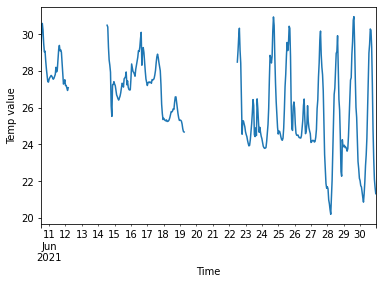

In [51]:
temp.plot()
plt.xlabel("Time")
plt.ylabel("Temp value")

In [58]:
co2_group = pivoted_sorted.groupby('co2')
humidity_group = pivoted_sorted.groupby('humidity')
nh3_group = pivoted_sorted.groupby('nh3')
temp_group = pivoted_sorted.groupby('temp')